In [1]:
import numpy as np
import matplotlib.pyplot as plt

masses = {}
list_pdg = [211,-211,111,321,-321,2212,-2212,3122,-3122]
list_mass = [0.14,0.14,0.135,0.494,0.494,0.9383,0.9383,1.11568,1.11568]

for k,v in zip(list_pdg,list_mass):
    masses[k]=v

import os

dir_list = os.listdir("./")
plot_list = ["./"+e+"/Plots"+"/" for e in dir_list if "grid" in e]
plot_list.sort()

def labeling_barocco(name):
    params = {}
    params['grid'] = name[6:9]  # int(name[6:9])
    params['Rg'] = name[11:14]  # float(name[11:14])
    params['alphamix'] = name[22:26]  # float(name[22:26])
    params['system'] = name[32:36]  # int(name[32:36])
    params['centrality'] = name[46:51]  # name[46:51]
    params['etaS'] = name[55:59]  # float(name[55:59])
    params['ecrit'] = name[64:67]  # float(name[64:67])
    
    return params

def load_plot_data(list_dir,data_type="yspectra.txt"):
    plot_data = {}
    list_dir2 = [l+data_type for l in list_dir]
    for k, dir in enumerate(list_dir2):
        plot_data[k] = {'dir': dir, 'params': labeling_barocco(dir), 'data': np.loadtxt(dir)}
    
    return plot_data


In [2]:
data_folder = "./multiplicities"
file = "Table1.csv"
test = np.genfromtxt(data_folder+"/"+file, skip_header=205,max_rows=58,delimiter=',')
# simul = np.loadtxt("v2.txt",unpack=True)

pt = test[:,0]
dNdpT = test[:,3]
Dp = np.sqrt(test[:,4]**2+test[:,6 ]**2)

(0.0, 4.5)

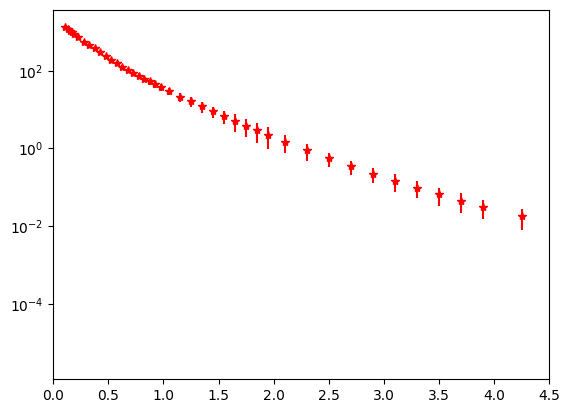

In [4]:
plt.errorbar(pt,(1/(2*np.pi*pt))*dNdpT,yerr=Dp,fmt='r*')
plt.yscale("log")
plt.xlim(0,4.5)

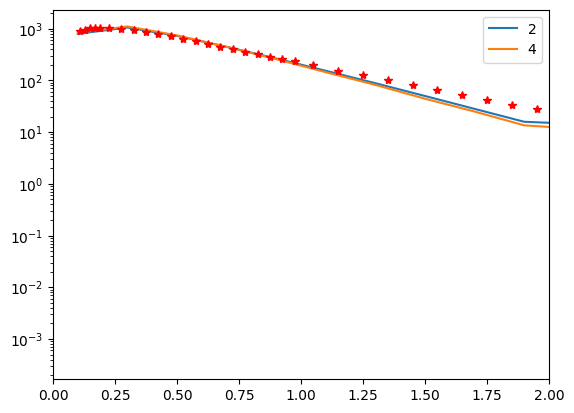

In [8]:
pt_iurii = load_plot_data(plot_list,"ptspectra.txt")

for k in range(0,len(pt_iurii)):
    if k==2 or k==4:
        plt.plot(pt_iurii[k]['data'][:,0],(pt_iurii[k]['data'][:,1]+pt_iurii[k]['data'][:,2])/(2000*0.2),label=str(k))
plt.errorbar(pt,dNdpT,yerr=Dp,fmt='r*')
plt.yscale("log")
plt.xlim(0,2)
plt.legend()
plt.show()

In [138]:
pt_iurii[6]["params"]

{'grid': '151',
 'Rg': '0.4',
 'alphamix': '0.15',
 'system': '5020',
 'centrality': '20-30',
 'etaS': '0.12',
 'ecrit': '0.5'}

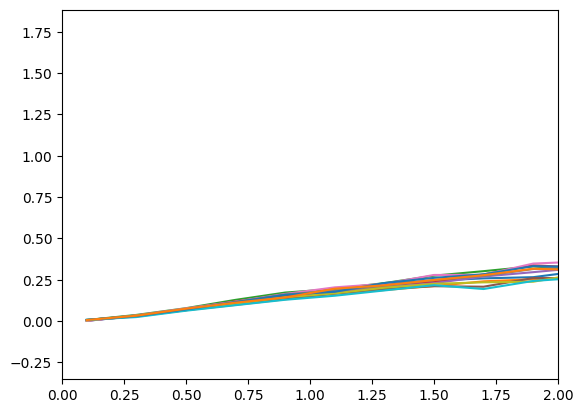

In [110]:
for k in range(0,len(test2)):
    plt.plot(test2[k]['data'][:,0],(test2[k]['data'][:,1]+test2[k]['data'][:,2]))
# plt.errorbar(pt,dNdpT,yerr=Dp,fmt='r*')
# plt.yscale("log")
plt.xlim(0,2)
plt.show()

(0.0, 4.5)

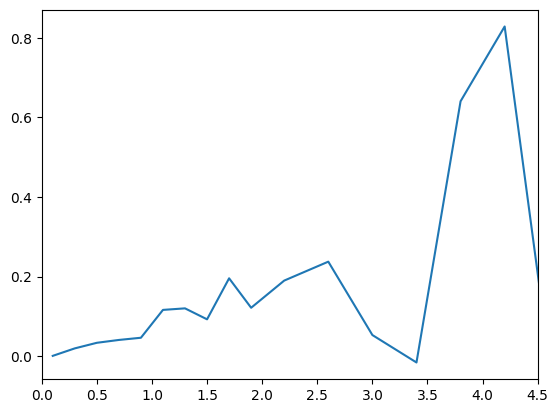

In [3]:
import matplotlib.pyplot as plt
simul = np.loadtxt("v2.txt",unpack=True)
# plt.errorbar(pt,dNdpT,yerr=Dp)
plt.plot(simul[0],simul[1])
# plt.yscale("log")
# plt.xscale("log")
plt.xlim(0,4.5)